In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
import networkx as nx
import csv

# Crie um objeto de grafo direcionado (ou não direcionado, dependendo de seus dados)
G = nx.DiGraph()  # Grafo direcionado

# Leitura do arquivo nodes.csv
with open('../data/nodes.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Adicione nós ao grafo
    for row in csv_reader:
        node_id = row[0]
        # Você pode adicionar mais atributos aos nós se houver mais informações no arquivo CSV
        G.add_node(node_id)

# Leitura do arquivo edges.csv
with open('../data/edges.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    
    # Adicione arestas ao grafo
    for row in csv_reader:
        source_node = row[0]
        target_node = row[1]
        # Você pode adicionar mais atributos às arestas se houver mais informações no arquivo CSV
        G.add_edge(source_node, target_node)

# Agora você tem um objeto de grafo NetworkX representando sua rede.
# Você pode realizar várias operações de análise e visualização com esse objeto.


In [35]:
G.remove_edges_from(nx.selfloop_edges(G))

k = 3  # Defina o valor de k desejado

# Calcule o k-core
k_core = nx.k_core(G, k)
print(k_core)

DiGraph with 10055 nodes and 52924 edges


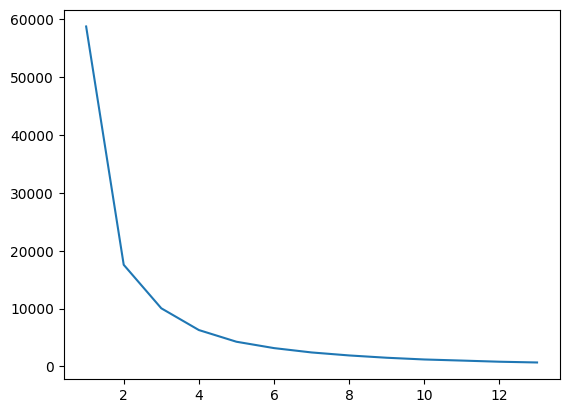

In [36]:
k_core_sizes = []
k_values = range(1, 11)  # Vamos calcular para k de 1 a 10

for k in k_values:
    k_core = nx.k_core(G, k)
    k_core_sizes.append(len(k_core))

# Crie o gráfico
plt.plot(k_values, k_core_sizes)


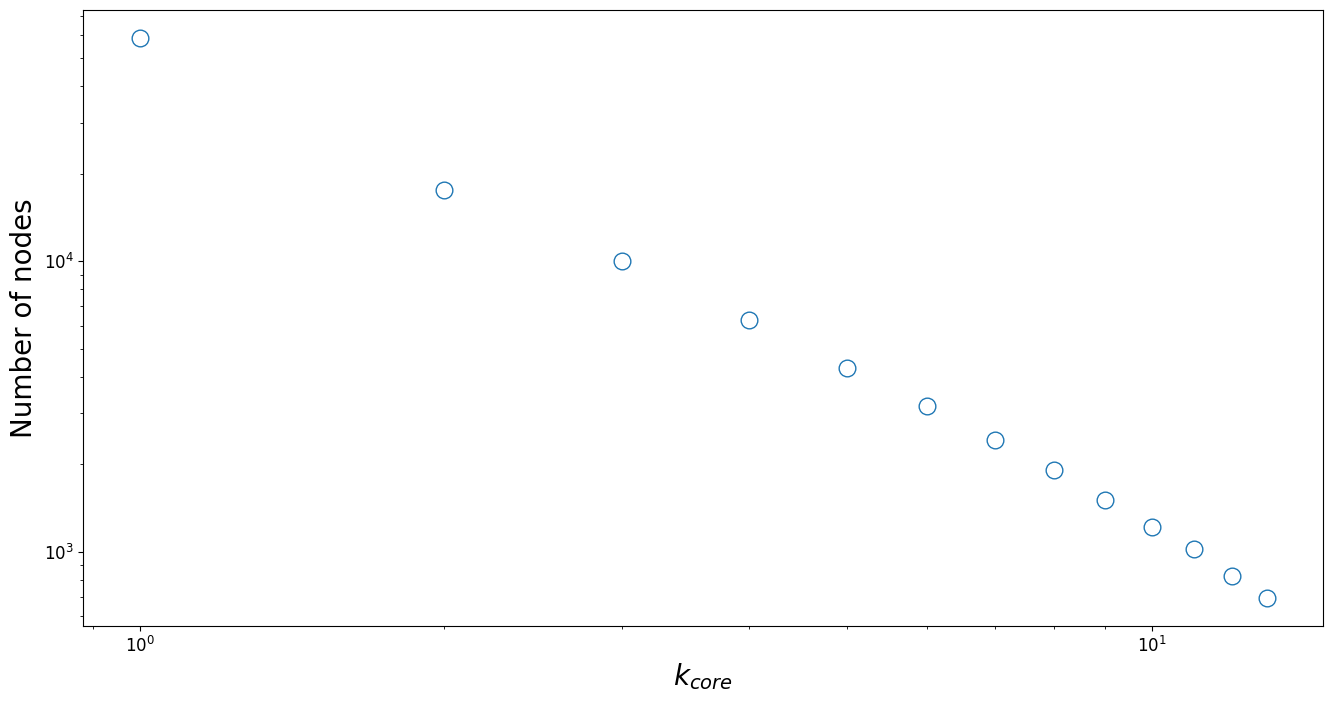

In [37]:
plt.figure(figsize=(16,8))
ms= 12
plt.plot(k_values, k_core_sizes,'o',ms=ms,mec=None,markerfacecolor='w')
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Number of nodes",fontsize=20)
plt.xlabel(r"$k_{core}$",fontsize=20)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()

In [38]:
k_medio_values = []

for k in k_values:
    k_core2 = nx.k_core(G, k)
    
    # Calcule o valor médio de k para o k-core
    k_core_degrees = [d for n, d in k_core2.degree()]
    k_medio = sum(k_core_degrees) / len(k_core_degrees)
    k_medio_values.append(k_medio)
plt.plot(k_values, k_medio_values, marker='o', linestyle='-')
plt.xlabel('Valor de k (k-core)')
plt.ylabel('Valor Médio de k (k_médio)')
plt.title('Gráfico k_médio vs. k_core')
plt.grid(True)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (13,) and (10,)

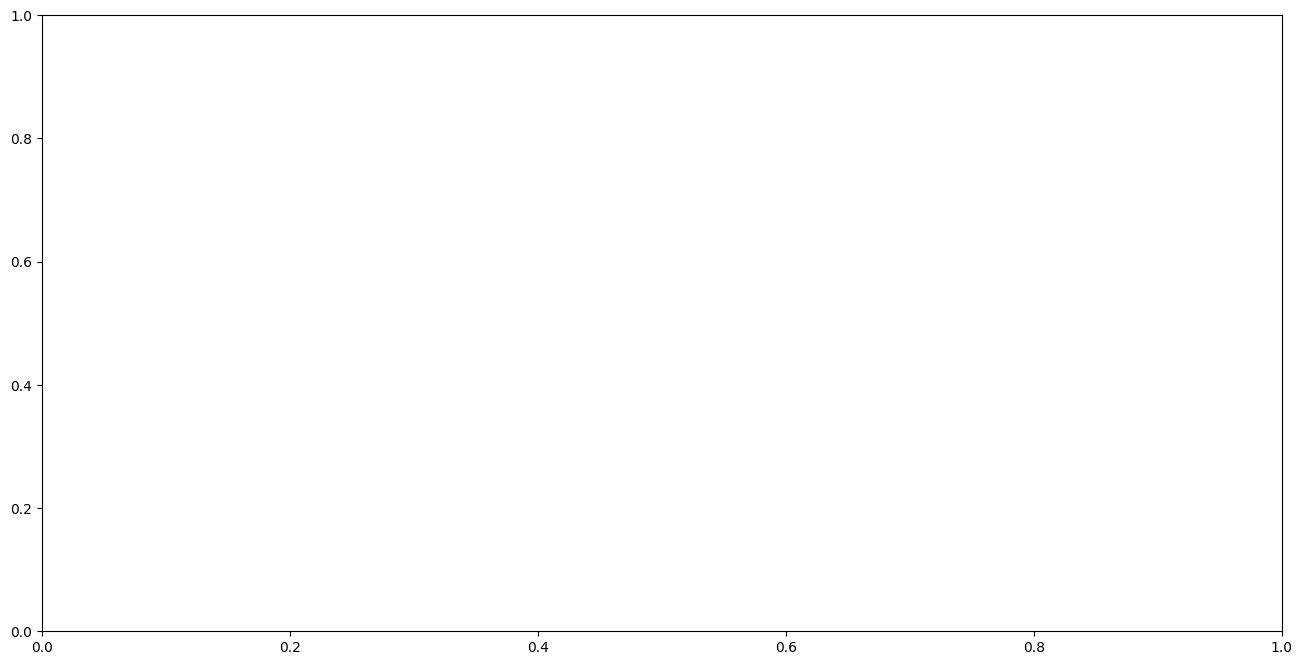

In [ ]:
plt.figure(figsize=(16,8))
ms= 12
plt.plot(k_values, k_medio_values,'o',ms=ms,mec=None,markerfacecolor='w')
plt.xscale("log")
plt.yscale("log")
plt.ylabel(r"$<k>$",fontsize=20)
plt.xlabel(r"$k_{core}$",fontsize=20)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.show()